#  1. INTRODUCTION:

This dataset contains global time series data representing various metrics across cities around the world. 
The data captures information that reflects trends, seasonality, and patterns specific to each city. Among these, four prominent Indian cities—Bombay (Mumbai), Calcutta (Kolkata), Chennai (Madras), and Delhi—have been selected as the focus of this project due to their economic, cultural, and historical significance.


These cities are not only vital to India's economy but also exhibit unique environmental, social, and urban patterns. By analyzing historical data for these cities, this project aims to develop predictive models that can forecast future trends based on past observations.


### Why Focus on These Cities?

##### Bombay (Mumbai):

Formerly known as Bombay, Mumbai is the financial capital of India.
It is known for its bustling economy, dense population, and coastal climate.

##### Calcutta (Kolkata):

Renamed Kolkata, this city is the cultural capital of India.
It has a rich history and is located in eastern India by the Hooghly River.
 
##### Chennai (Madras):
 
Formerly called Madras, Chennai is a major hub in southern India.
Known for its tropical climate and thriving automotive and IT industries.

##### Delhi:
 
The national capital of India, Delhi is a historical and administrative center.
It experiences an extreme climate with distinct summer, winter, and monsoon seasons.

# 2. Problem Statement:

 The goal of this project is to build a predictive model for time series data of four key Indian cities: Bombay (Mumbai), Calcutta (Kolkata), Chennai (Madras), and Delhi. Using historical data, the project seeks to address the following:
 
#### Trend Analysis:
Understand long-term trends in the data, including economic, climatic, or urbanization patterns.
 
#### Seasonality Exploration:
Identify seasonal patterns (e.g., monsoon, festival periods) that influence city-specific metrics.
 
#### Forecasting Future Trends:
Develop a robust model capable of predicting future values for the selected cities, aiding in better planning and decision-making.

#### Comparative Analysis:
Analyze the similarities and differences in patterns across the four cities to gain insights into regional variations.

#### Key Challenges
Handling a large, global dataset and isolating relevant data for the four cities.
Ensuring stationarity of the time series data for effective modeling.
Balancing complex patterns of trend, seasonality, and irregularity unique to each city.


# 3. Importing Libraries

In [1]:

import numpy as np # mathematical library
# ..............................................................................................................................
import pandas as pd # for handling data
pd.set_option('display.precision', 2)
# ..............................................................................................................................
import matplotlib.pyplot as plt # for plotting graphs
get_ipython().run_line_magic('matplotlib', 'inline')
#...............................................................................................................................
import seaborn as sns
#...............................................................................................................................
import warnings
warnings.filterwarnings("ignore")

C:\Users\HELL\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 4.  Data Acquisition 

In [2]:
avg_temperature = pd.read_csv(r"C:\Users\HELL\Documents\avg_temperature.csv")
avg_temperature

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


# 5. Data Pre-processinng

In [3]:
avg_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [4]:
list(avg_temperature[avg_temperature['Country']=='India']['City'].unique())

['Bombay (Mumbai)', 'Calcutta', 'Chennai (Madras)', 'Delhi']

In [5]:
city_of_interest = list(avg_temperature[avg_temperature['Country']=='India']['City'].unique())
print(city_of_interest)

['Bombay (Mumbai)', 'Calcutta', 'Chennai (Madras)', 'Delhi']


In [6]:
indian_temp = avg_temperature[avg_temperature['Country']=='India']

indian_temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature
312523,Asia,India,NaN,Bombay (Mumbai),1,1,1995,71.8
312524,Asia,India,NaN,Bombay (Mumbai),1,2,1995,72.0
312525,Asia,India,NaN,Bombay (Mumbai),1,3,1995,70.3
312526,Asia,India,NaN,Bombay (Mumbai),1,4,1995,69.7
312527,Asia,India,NaN,Bombay (Mumbai),1,5,1995,71.3
...,...,...,...,...,...,...,...,...
349581,Asia,India,NaN,Delhi,5,8,2020,89.9
349582,Asia,India,NaN,Delhi,5,9,2020,92.3
349583,Asia,India,NaN,Delhi,5,10,2020,81.9
349584,Asia,India,NaN,Delhi,5,11,2020,84.7


In [7]:
cols = ['Year','Month','Day']

indian_temp['date'] = indian_temp[cols].apply(lambda x : ('-').join(x.values.astype(str)),axis=1)

indian_temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature,date
312523,Asia,India,NaN,Bombay (Mumbai),1,1,1995,71.8,1995-1-1
312524,Asia,India,NaN,Bombay (Mumbai),1,2,1995,72.0,1995-1-2
312525,Asia,India,NaN,Bombay (Mumbai),1,3,1995,70.3,1995-1-3
312526,Asia,India,NaN,Bombay (Mumbai),1,4,1995,69.7,1995-1-4
312527,Asia,India,NaN,Bombay (Mumbai),1,5,1995,71.3,1995-1-5
...,...,...,...,...,...,...,...,...,...
349581,Asia,India,NaN,Delhi,5,8,2020,89.9,2020-5-8
349582,Asia,India,NaN,Delhi,5,9,2020,92.3,2020-5-9
349583,Asia,India,NaN,Delhi,5,10,2020,81.9,2020-5-10
349584,Asia,India,NaN,Delhi,5,11,2020,84.7,2020-5-11


In [8]:
indian_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37063 entries, 312523 to 349585
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          37063 non-null  object 
 1   Country         37063 non-null  object 
 2   State           0 non-null      object 
 3   City            37063 non-null  object 
 4   Month           37063 non-null  int64  
 5   Day             37063 non-null  int64  
 6   Year            37063 non-null  int64  
 7   AvgTemperature  37063 non-null  float64
 8   date            37063 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [9]:
indian_temp['date']= pd.to_datetime(indian_temp['date'])

In [10]:
indian_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37063 entries, 312523 to 349585
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          37063 non-null  object        
 1   Country         37063 non-null  object        
 2   State           0 non-null      object        
 3   City            37063 non-null  object        
 4   Month           37063 non-null  int64         
 5   Day             37063 non-null  int64         
 6   Year            37063 non-null  int64         
 7   AvgTemperature  37063 non-null  float64       
 8   date            37063 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 2.8+ MB


In [11]:
delhi_temp = indian_temp[indian_temp['City']=='Delhi'][['date','AvgTemperature']]
mumbai_temp = indian_temp[indian_temp['City']=='Bombay (Mumbai)'][['date','AvgTemperature']]
chennai_temp = indian_temp[indian_temp['City']=='Chennai (Madras)'][['date','AvgTemperature']]
kolkata_temp = indian_temp[indian_temp['City']=='Calcutta'][['date','AvgTemperature']]

In [12]:
delhi_temp.set_index('date', inplace = True)
mumbai_temp.set_index('date', inplace = True)
chennai_temp.set_index('date', inplace = True)
kolkata_temp.set_index('date', inplace = True)

In [13]:
mumbai_temp

,AvgTemperature
date,
1995-01-01,71.8
1995-01-02,72.0
1995-01-03,70.3
1995-01-04,69.7
1995-01-05,71.3
...,...
2020-05-09,87.3
2020-05-10,87.7
2020-05-11,88.1


 # 6. Visualization of Data

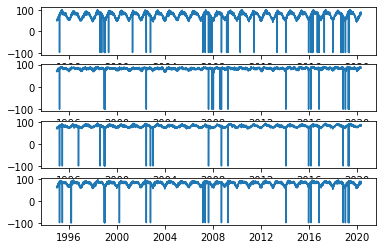

In [14]:
plt.subplot(4,1,1)
plt.plot(delhi_temp)

plt.subplot(4,1,2)
plt.plot(mumbai_temp)

plt.subplot(4,1,3)
plt.plot(chennai_temp)

plt.subplot(4,1,4)
plt.plot(kolkata_temp)

In [15]:
mumbai_temp.describe()

,AvgTemperature
count,9266.00
mean,81.53
std,10.99
min,-99.00
25%,79.90
50%,82.60
75%,84.70
max,92.60


- Value of all sudden drops are same -99 , which might be bacause default reading of temp sensor in case of non-functoning. 
- These data points can be treated as missing values

<Axes: xlabel='date'>

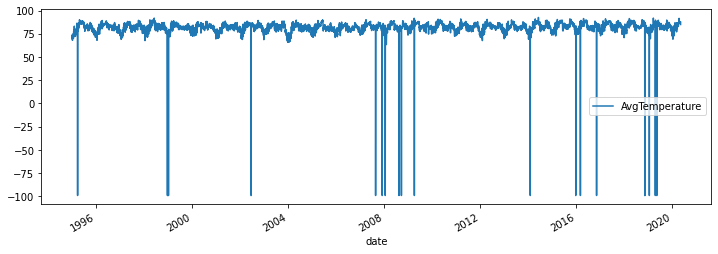

In [16]:
mumbai_temp.plot(figsize=(12,4))

- Filling missing values by mean of values against t-1 and t+1

In [17]:
mumbai_temp[mumbai_temp['AvgTemperature']==-99.0]

,AvgTemperature
date,
1995-03-29,-99.0
1998-12-24,-99.0
1998-12-25,-99.0
1998-12-30,-99.0
1998-12-31,-99.0
1999-01-10,-99.0
2002-06-18,-99.0
2002-06-19,-99.0
2002-06-20,-99.0


- Interpolate the missing values (for -99.0)

In [18]:
mumbai_temp['AvgTemperature'] = mumbai_temp['AvgTemperature'].replace(-99.0, np.nan)
print(mumbai_temp)

            AvgTemperature
date                      
1995-01-01            71.8
1995-01-02            72.0
1995-01-03            70.3
1995-01-04            69.7
1995-01-05            71.3
...                    ...
2020-05-09            87.3
2020-05-10            87.7
2020-05-11            88.1
2020-05-12            87.3
2020-05-13            85.0

[9266 rows x 1 columns]


In [19]:
mumbai_temp.isna().sum()

AvgTemperature    30
dtype: int64

In [20]:
mumbai_temp['1998-12-23':'1998-12-26']

,AvgTemperature
date,
1998-12-23,76.4
1998-12-24,NaN
1998-12-25,NaN
1998-12-26,78.2


- Fill NaNs with the average of forward-fill and backward-fill values

In [21]:
mumbai_temp['AvgTemperature'] = (
    mumbai_temp['AvgTemperature'].fillna(method='ffill') + 
    mumbai_temp['AvgTemperature'].fillna(method='bfill')
) / 2

In [22]:
mumbai_temp['1998-12-23':'1998-12-26']

,AvgTemperature
date,
1998-12-23,76.4
1998-12-24,77.3
1998-12-25,77.3
1998-12-26,78.2


In [23]:
time_diffs = mumbai_temp.index.to_series().diff()

# Defining  expected frequency ( '1D' for daily)
expected_frequency = pd.Timedelta('1D')  # based on time series

# Check for irregularities
irregularities = time_diffs[time_diffs != expected_frequency]

# result
if not irregularities.empty:
    print("Irregular time intervals found:")
    print(irregularities)
else:
    print("Timestamps are in sequence.")

Irregular time intervals found:
date
1995-01-01      NaT
2015-12-30   0 days
Name: date, dtype: timedelta64[ns]


In [24]:
duplicates = mumbai_temp.index[mumbai_temp.index.duplicated(keep=False)]
print("Duplicate timestamps found:")
print(duplicates)

Duplicate timestamps found:
DatetimeIndex(['2015-12-30', '2015-12-30'], dtype='datetime64[ns]', name='date', freq=None)


In [25]:
mumbai_temp = mumbai_temp[~mumbai_temp.index.duplicated(keep='first')]

In [26]:
time_diffs = mumbai_temp.index.to_series().diff()
irregularities = time_diffs[time_diffs != expected_frequency]

if not irregularities.empty:
    print("Still irregular intervals:")
    print(irregularities)
else:
    print("Timestamps are now consistent.")

Still irregular intervals:
date
1995-01-01   NaT
Name: date, dtype: timedelta64[ns]


In [27]:
mumbai_temp.index.duplicated().sum()

0

<Axes: xlabel='date'>

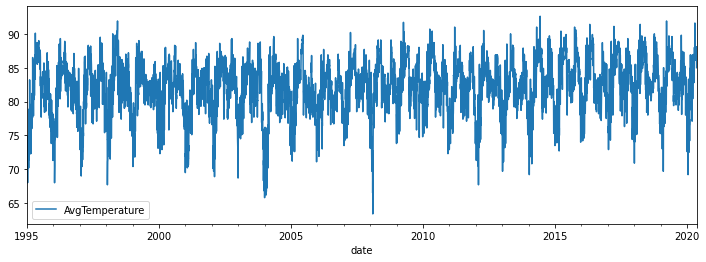

In [28]:
mumbai_temp.plot(figsize=(12,4))

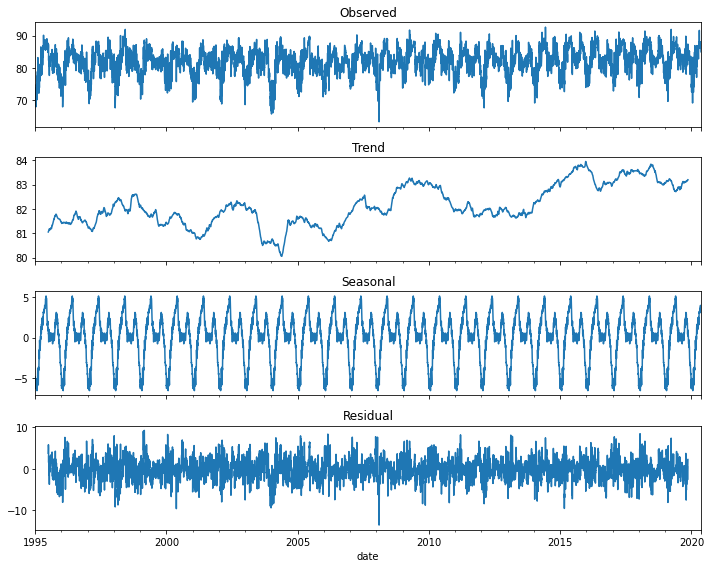

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series using the correct column name
decomposition = seasonal_decompose(mumbai_temp["AvgTemperature"], model="additive", period=365)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], title="Observed")
decomposition.trend.plot(ax=axes[1], title="Trend")
decomposition.seasonal.plot(ax=axes[2], title="Seasonal")
decomposition.resid.plot(ax=axes[3], title="Residual")

plt.tight_layout()
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller, kpss
# Perform ADF Test
result_adf = adfuller(mumbai_temp["AvgTemperature"].dropna())

print("ADF Test Results:")
print(f"ADF Statistic: {result_adf[0]}")
print(f"p-value: {result_adf[1]}")
print("Critical Values:")
for key, value in result_adf[4].items():
    print(f"   {key}: {value}")

if result_adf[1] < 0.01:
    print("The series is stationary (reject H0).")
else:
    print("The series is non-stationary (fail to reject H0).")

ADF Test Results:
ADF Statistic: -9.402124641043333
p-value: 6.14740525333548e-16
Critical Values:
   1%: -3.4310588339793924
   5%: -2.8618532595677477
   10%: -2.566936742999529
The series is stationary (reject H0).


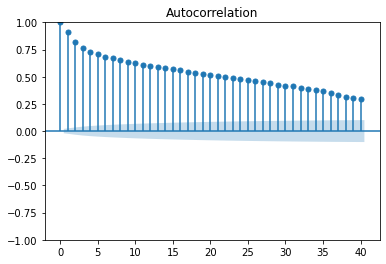

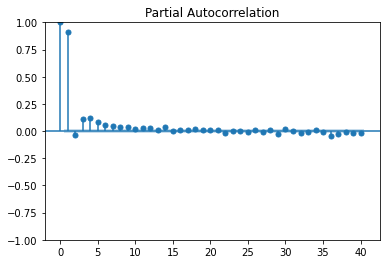

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(mumbai_temp["AvgTemperature"])
plt.show()

# Plot PACF
plot_pacf(mumbai_temp["AvgTemperature"])
plt.show()

In [32]:
train = mumbai_temp.iloc[:-12]  # All but the last 12 months
test = mumbai_temp.iloc[-12:]  # Last 12 months

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
# Define the ARIMA model
model = ARIMA(train["AvgTemperature"], order=(3, 0, 0))  # Order (p, d, q)

# Fit the model
arima_model = model.fit()

# Print model summary
print(arima_model.summary())

C:\Users\HELL\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HELL\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HELL\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         AvgTemperature   No. Observations:                 9253
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -17448.478
Date:                Fri, 16 May 2025   AIC                          34906.955
Time:                        17:39:42   BIC                          34942.619
Sample:                    01-01-1995   HQIC                         34919.074
                         - 05-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.1080      0.208    394.479      0.000      81.700      82.516
ar.L1          0.9435      0.008    111.092      0.000       0.927       0.960
ar.L2         -0.1413      0.012    -11.836      0.0

In [35]:
forecast = arima_model.forecast(steps=10)
print(forecast)

2020-05-02    86.91
2020-05-03    86.53
2020-05-04    86.20
2020-05-05    85.90
2020-05-06    85.62
2020-05-07    85.36
2020-05-08    85.12
2020-05-09    84.90
2020-05-10    84.69
2020-05-11    84.50
Freq: D, Name: predicted_mean, dtype: float64


In [36]:
# Use get_forecast() to get both forecasted values and confidence intervals
forecast_result = arima_model.get_forecast(steps=12)

# Extract the forecasted values
forecast_values = forecast_result.predicted_mean

# Extract the confidence intervals
confidence_intervals = forecast_result.conf_int()

# Display forecasted values and confidence intervals
print("Forecasted Values:")
print(forecast_values)
print("\nConfidence Intervals:")
print(confidence_intervals)

Forecasted Values:
2020-05-02    86.91
2020-05-03    86.53
2020-05-04    86.20
2020-05-05    85.90
2020-05-06    85.62
2020-05-07    85.36
2020-05-08    85.12
2020-05-09    84.90
2020-05-10    84.69
2020-05-11    84.50
2020-05-12    84.32
2020-05-13    84.16
Freq: D, Name: predicted_mean, dtype: float64

Confidence Intervals:
            lower AvgTemperature  upper AvgTemperature
2020-05-02                 83.79                 90.04
2020-05-03                 82.24                 90.83
2020-05-04                 81.31                 91.10
2020-05-05                 80.56                 91.25
2020-05-06                 79.90                 91.34
2020-05-07                 79.33                 91.39
2020-05-08                 78.84                 91.39
2020-05-09                 78.42                 91.37
2020-05-10                 78.04                 91.34
2020-05-11                 77.70                 91.29
2020-05-12                 77.41                 91.23
2020-05-13  

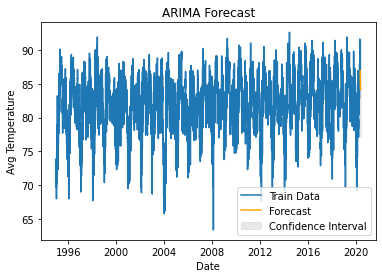

In [37]:
import matplotlib.pyplot as plt

# Plot the actual data
plt.plot(train.index, train["AvgTemperature"], label="Train Data")

# Forecast index (adjust frequency as needed)
forecast_index = pd.date_range(start=train.index[-1], periods=12, freq="D")

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label="Forecast", color="orange")

# Add confidence intervals
plt.fill_between(forecast_index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color="lightgrey", alpha=0.5, label="Confidence Interval")

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Avg Temperature")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

In [38]:
mumbai_temp.max() - mumbai_temp.min()

AvgTemperature    29.2
dtype: float64

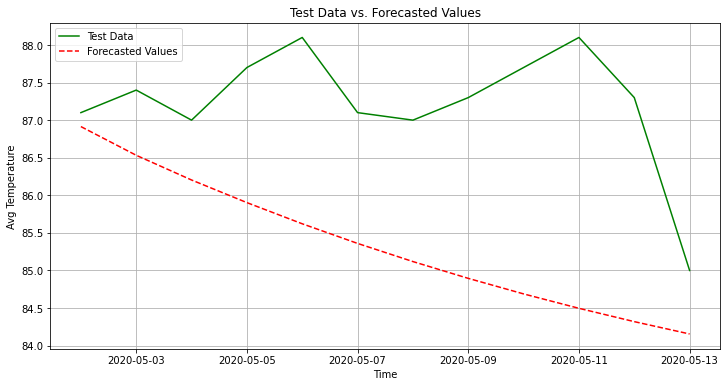

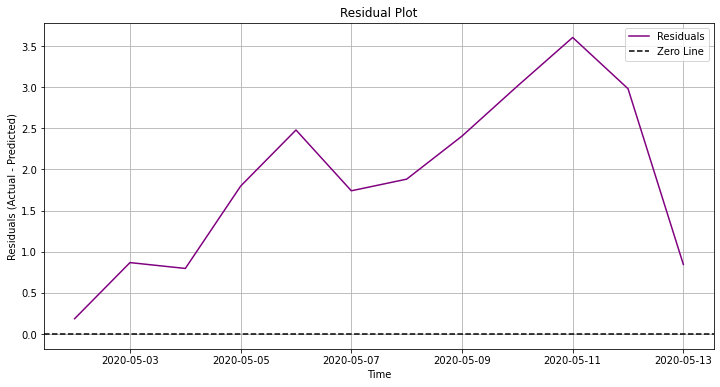

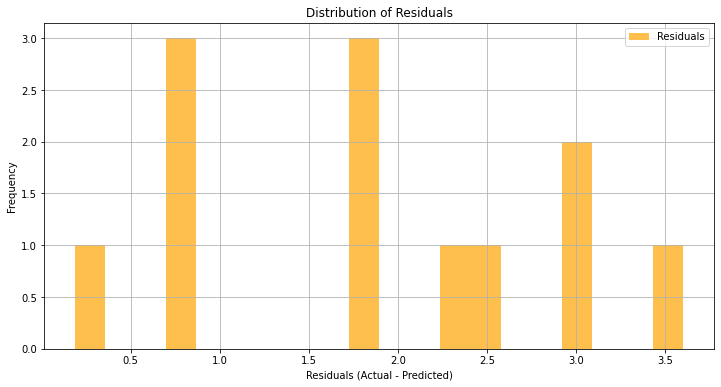

Mean Absolute Error (MAE): 1.8827814477111542
Mean Squared Error (MSE): 4.566983734926156
Root Mean Squared Error (RMSE): 2.137050241554034


In [39]:
forecast_steps = len(test)  # Number of steps to forecast, same as test data length
forecast_values = arima_model.forecast(steps=forecast_steps)

# Step 2: Calculate residuals (errors)
residuals = test["AvgTemperature"] - forecast_values

# 1. Line Plot for Test vs Forecasted Values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test["AvgTemperature"], label="Test Data", color="green")
plt.plot(test.index, forecast_values, label="Forecasted Values", color="red", linestyle="--")
plt.title("Test Data vs. Forecasted Values")
plt.xlabel("Time")
plt.ylabel("Avg Temperature")
plt.legend()
plt.grid(True)
plt.show()

# 2. Residual Plot (Expected to be random if the model is good)
plt.figure(figsize=(12, 6))
plt.plot(test.index, residuals, label="Residuals", color="purple")
plt.axhline(y=0, color="black", linestyle="--", label="Zero Line")
plt.title("Residual Plot")
plt.xlabel("Time")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()

# 3. Histogram of Residuals (Error Distribution)
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=20, alpha=0.7, label="Residuals", color="orange")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 4. Error Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test["AvgTemperature"], forecast_values)
mse = mean_squared_error(test["AvgTemperature"], forecast_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")